In [256]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

In [257]:
edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [258]:
edu_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [259]:
column=['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

In [260]:
state=edu_df['STATE'].unique()
state

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'WYOMING', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'BUREAU_OF_INDIAN_AFFAIRS',
       'DOD_OVERSEAS', 'DOD_DOMESTIC', 'AMERICAN_SAMOA', 'GUAM',
       'NORTHERN_MARIANAS', 'PUERTO_RICO', 'VIRGIN_ISLANDS', 'BI', 'DD',
       'NORTHERN_MARIANA_ISLANDS', 'DEPARTMENT_OF_DEFENSE',
       'BUREAU_OF_INDIAN_EDUCATION',
       'DEPART

In [261]:
education_df=edu_df.copy()

In [262]:
for s in state:
    education_df.loc[education_df['STATE']==s,column]=education_df.loc[education_df['STATE']==s,column].interpolate()

In [263]:
education_df.isna().any()

PRIMARY_KEY                     False
STATE                           False
YEAR                            False
ENROLL                           True
TOTAL_REVENUE                    True
FEDERAL_REVENUE                  True
STATE_REVENUE                    True
LOCAL_REVENUE                    True
TOTAL_EXPENDITURE                True
INSTRUCTION_EXPENDITURE          True
SUPPORT_SERVICES_EXPENDITURE     True
OTHER_EXPENDITURE                True
CAPITAL_OUTLAY_EXPENDITURE       True
GRADES_PK_G                      True
GRADES_KG_G                      True
GRADES_4_G                       True
GRADES_8_G                       True
GRADES_12_G                      True
GRADES_1_8_G                     True
GRADES_9_12_G                    True
GRADES_ALL_G                     True
AVG_MATH_4_SCORE                 True
AVG_MATH_8_SCORE                 True
AVG_READING_4_SCORE              True
AVG_READING_8_SCORE              True
dtype: bool

In [264]:
education_df.dropna(inplace=True)

In [265]:
education_df.isna().any()

PRIMARY_KEY                     False
STATE                           False
YEAR                            False
ENROLL                          False
TOTAL_REVENUE                   False
FEDERAL_REVENUE                 False
STATE_REVENUE                   False
LOCAL_REVENUE                   False
TOTAL_EXPENDITURE               False
INSTRUCTION_EXPENDITURE         False
SUPPORT_SERVICES_EXPENDITURE    False
OTHER_EXPENDITURE               False
CAPITAL_OUTLAY_EXPENDITURE      False
GRADES_PK_G                     False
GRADES_KG_G                     False
GRADES_4_G                      False
GRADES_8_G                      False
GRADES_12_G                     False
GRADES_1_8_G                    False
GRADES_9_12_G                   False
GRADES_ALL_G                    False
AVG_MATH_4_SCORE                False
AVG_MATH_8_SCORE                False
AVG_READING_4_SCORE             False
AVG_READING_8_SCORE             False
dtype: bool

## 1. Compute the average score for each row for all students weighted properly by grade. In other words, each row will have its own average. Notice that the number of students in the fourth grade isn't the same as the number of students in the eighth grade. So, you should appropriately weigh the scores.

In [268]:
education_df['avg_grade']=(education_df["GRADES_4_G"]*((education_df["AVG_MATH_4_SCORE"] + education_df["AVG_READING_4_SCORE"])*0.5) + education_df["GRADES_8_G"] 
                                 * ((education_df["AVG_MATH_8_SCORE"] + education_df["AVG_READING_8_SCORE"])*0.5))/(education_df["GRADES_4_G"] + education_df["GRADES_8_G"])

In [269]:
education_df.head(3)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_grade
54,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,53500.0,37614.0,461398.0,182737.0,647299.0,215.834434,265.993417,206.291984,262.448330,236.637935
55,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,36471.0,27169.0,280280.0,125801.0,407329.0,211.616130,257.647254,208.685273,266.423396,236.905842
57,1993_COLORADO,COLORADO,1993,539538.0,3058326.0,147793.0,1242337.0,1668196.0,3028305.0,1537714.0,...,47665.0,34770.0,403871.0,164260.0,575380.0,222.219036,273.200878,215.523979,266.856804,243.634022


## 2. What are the correlations between this newly created score variable and the expenditure types? Which one of the expenditure types is more correlated than the others?

In [272]:
education_df[['avg_grade','TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']].corr()

,avg_grade,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
avg_grade,1.000000,0.093020,0.105787,0.098643,0.027635,0.010670
TOTAL_EXPENDITURE,0.093020,1.000000,0.990829,0.993175,0.946483,0.928576
INSTRUCTION_EXPENDITURE,0.105787,0.990829,1.000000,0.975867,0.907235,0.889763
SUPPORT_SERVICES_EXPENDITURE,0.098643,0.993175,0.975867,1.000000,0.953789,0.913680
OTHER_EXPENDITURE,0.027635,0.946483,0.907235,0.953789,1.000000,0.924197
CAPITAL_OUTLAY_EXPENDITURE,0.010670,0.928576,0.889763,0.913680,0.924197,1.000000


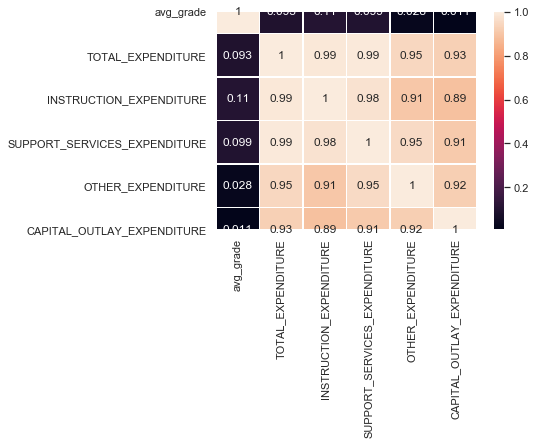

In [273]:
sns.heatmap(df.corr(),square=True,annot=True,linewidth=0.5)

INSTRUCTION_EXPENDITURE is more correlated

## 3. Now, apply PCA to the four expenditure types. How much of the total variance is explained by the first component? 

In [287]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X=education_df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]
X=StandardScaler().fit_transform(X)
pca=PCA(n_components=1)
pca1=pca.fit_transform(X)

In [288]:
pca1

array([[-0.92069757],
       [-1.34651774],
       [-1.11668175],
       ...,
       [-0.97377763],
       [ 0.13057022],
       [-1.22054714]])

In [281]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.94568116]


## 4. What is the correlation between the overall score variable and the first principal component? 

In [289]:
education_df['pca1']=pca1

In [290]:
education_df.head(1)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_grade,pca,pca1
54,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,461398.0,182737.0,647299.0,215.834434,265.993417,206.291984,262.44833,236.637935,"PCA(copy=True, iterated_power='auto', n_compon...",-0.920698


In [292]:
education_df[['avg_grade','pca1']].corr()

,avg_grade,pca1
avg_grade,1.000000,0.062716
pca1,0.062716,1.000000


## 5. If you were to choose the best variables for your model, would you prefer using the first principal component instead of the expenditure variables? Why?

In [293]:
education_df[['avg_grade','pca1','TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']].corr()

,avg_grade,pca1,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
avg_grade,1.000000,0.062716,0.093020,0.105787,0.098643,0.027635,0.010670
pca1,0.062716,1.000000,0.992264,0.970167,0.988317,0.973193,0.957927
TOTAL_EXPENDITURE,0.093020,0.992264,1.000000,0.990829,0.993175,0.946483,0.928576
INSTRUCTION_EXPENDITURE,0.105787,0.970167,0.990829,1.000000,0.975867,0.907235,0.889763
SUPPORT_SERVICES_EXPENDITURE,0.098643,0.988317,0.993175,0.975867,1.000000,0.953789,0.913680
OTHER_EXPENDITURE,0.027635,0.973193,0.946483,0.907235,0.953789,1.000000,0.924197
CAPITAL_OUTLAY_EXPENDITURE,0.010670,0.957927,0.928576,0.889763,0.913680,0.924197,1.000000


# -------------------------------------------------------------------

In [202]:
sum(edu_df['GRADES_4_G'].dropna())-sum(edu_df['GRADES_8_G'].dropna())

364571.0